# Plot 3xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import get_weighted 

import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import tmdlib.tmd_fit_witherr as tmd_err

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0321.dat
DSSFFlo PDF set, member #321, version 1; LHAPDF ID = 90321
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs'

In [2]:
#def Get_weighted_average(value,error):
#    
#    Factor = 0.3894*1e6
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += value[i]/(error[i]*error[i])
#        sum_sigma += 1/(error[i]*error[i])
#    return Factor*sum_mean/sum_sigma,Factor*math.sqrt(1/sum_sigma)
#def Get_weighted_average_phi(value,error):
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += value[i]/(error[i]*error[i])
#        sum_sigma += 1/(error[i]*error[i])
#    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_weighted_average(value,error):
#    Factor=2841.438#((1/137)*0.3894*1e6)
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += Factor*value[i]/((Factor*137.035999074/(4*math.pi**2))**2*error[i]*error[i])
#        sum_sigma += 1/((Factor*137.035999074/(4*math.pi**2))**2*error[i]*error[i])
#    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_weighted_average_phi(value,error):
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += value[i]/(error[i]*error[i])
#        sum_sigma += 1/(error[i]*error[i])
#    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_weighted_average(value,error):
#    Factor=(0.3894*1e6)/(2)
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += Factor*value[i]/((Factor/(math.pi))**2*error[i]**2)
#        sum_sigma += 1/((Factor/(math.pi))**2*error[i]**2)
#    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_weighted_average_phi(value,error):
#    sum_mean = 0
#    sum_sigma = 0
#    #print(value,error)
#    for i in range(len(value)):
#        #print(i,value[i],error[i])
#        sum_mean += value[i]/(error[i]*error[i])
#        sum_sigma += 1/(error[i]*error[i])
#    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average(value,error):
    Factor=(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)

In [3]:
#for pim
#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi/simenhancedpip_lowQ2_Pt_lumi3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.148401,0.460127,0.323600,1.395059,0.025838,FUUT,0.008347,0.000307,0.0,0.0,neutron,pi+,solid,0.000307
1,1,11.0,0.144967,0.469019,0.323519,1.384619,0.047115,FUUT,0.008311,0.000300,0.0,0.0,neutron,pi+,solid,0.000300
2,2,11.0,0.142071,0.476625,0.323531,1.375988,0.060577,FUUT,0.008269,0.000303,0.0,0.0,neutron,pi+,solid,0.000303
3,3,11.0,0.139508,0.483251,0.323386,1.367870,0.070407,FUUT,0.008251,0.000323,0.0,0.0,neutron,pi+,solid,0.000323
4,4,11.0,0.137442,0.488711,0.323293,1.361541,0.078490,FUUT,0.008225,0.000312,0.0,0.0,neutron,pi+,solid,0.000312


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()

3.141592653589793


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
3870,3870,8.8,0.170520,0.443273,0.323662,1.229626,0.015001,FUUT,0.008178,0.000321,0.0,0.0,neutron,pi+,solid,0.000321
3871,3871,8.8,0.169731,0.446624,0.323530,1.231901,0.027939,FUUT,0.008111,0.000311,0.0,0.0,neutron,pi+,solid,0.000311
3872,3872,8.8,0.168739,0.449584,0.323574,1.231390,0.036558,FUUT,0.008065,0.000319,0.0,0.0,neutron,pi+,solid,0.000319
3873,3873,8.8,0.167966,0.452599,0.323701,1.232438,0.043467,FUUT,0.007997,0.000320,0.0,0.0,neutron,pi+,solid,0.000320
3874,3874,8.8,0.167174,0.455116,0.323733,1.232340,0.049496,FUUT,0.007951,0.000320,0.0,0.0,neutron,pi+,solid,0.000320


169
142
117
95
77
60


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

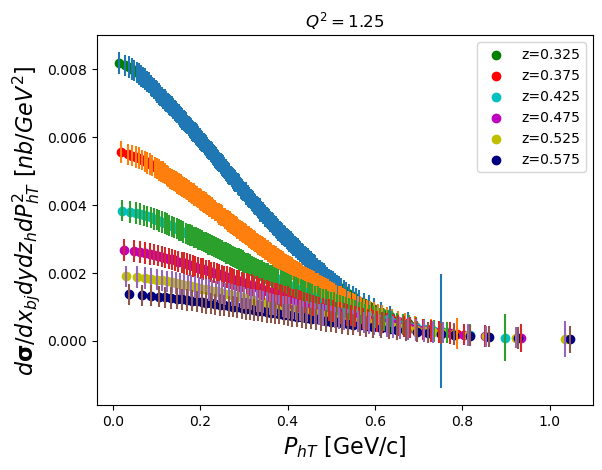

In [5]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'.pdf')

12
12
12
12
12
12


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

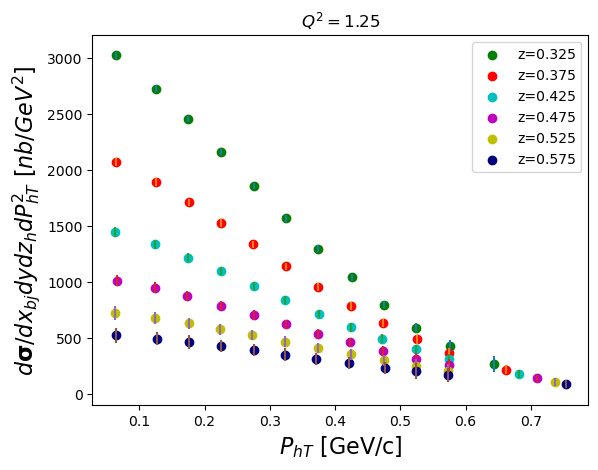

In [9]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'.pdf')
#file.close()

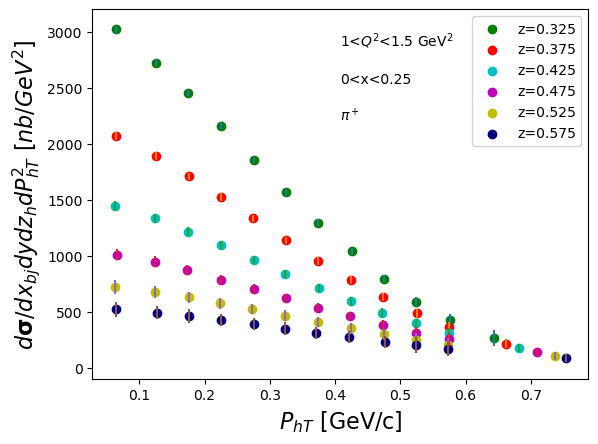

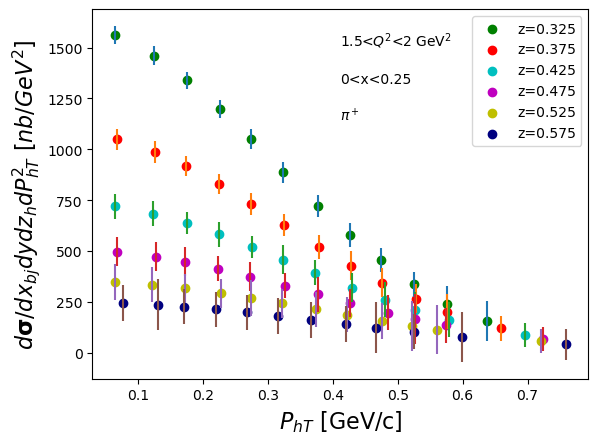

In [11]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_x1_pip_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-2):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_8_pip.pdf')
file.close()

7
7


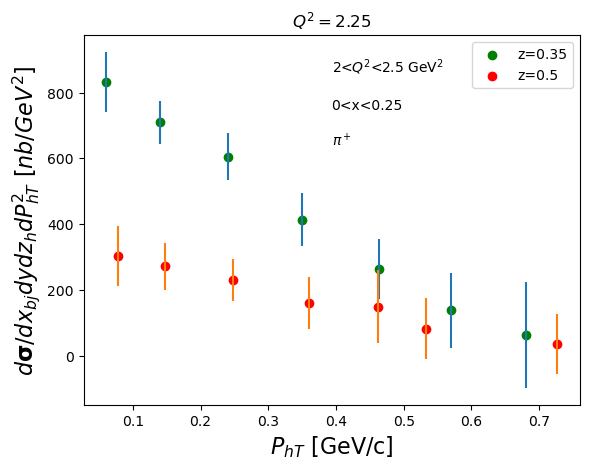

In [14]:
#plot for the Q2 bins
i_Q2=3
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,1.6]
file=open('Materials/results_June2024/onephi/numbers_x1_pip_8.txt','a')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_8_pip.pdf')
file.close()

In [17]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,1.6]
file=open('Materials/results_June2024/onephi/numbers_x1_pip_8.txt','a')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_8_pip.pdf')
file.close()

ZeroDivisionError: division by zero

In [ ]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

In [ ]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_x2_pip_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_x2_'+str(i_Q2)+'_8_pip.pdf')
file.close()

In [ ]:

#for high Q2 pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi/simenhancedpip_highQ2_Pt_lumi3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

In [ ]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


In [ ]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'.pdf')

In [ ]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_hQ2_Pt_'+str(i_Q2)+'_11_pip.pdf')
#file.close()

In [ ]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_hQ2_x2_pip_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_hQ2_Pt_'+str(i_Q2)+'_8_pip.pdf')
file.close()

In [ ]:
#For Pi-

In [ ]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi/simenhancedpim_lowQ2_Pt_lumi3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

In [ ]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


In [ ]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'.pdf')

In [ ]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_pim.pdf')
#file.close()

In [ ]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_x1_pim_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_8_pim.pdf')
file.close()

In [ ]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.5,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.6]
file=open('Materials/results_June2024/onephi/numbers_x1_pim_8.txt','a')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'_8_pim.pdf')
file.close()

In [ ]:
#for pi- x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

In [ ]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_x2_pim_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_x2_'+str(i_Q2)+'_8_pim.pdf')
file.close()

In [ ]:
#for pim
#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi/simenhancedpim_highQ2_Pt_lumi3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

In [ ]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


In [ ]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_Pt_'+str(i_Q2)+'.pdf')

In [ ]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_hQ2_Pt_'+str(i_Q2)+'_pim.pdf')
#file.close()

In [ ]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi/numbers_hQ2_x2_pim_8.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/FuuA_hQ2_Pt_'+str(i_Q2)+'_8_pim.pdf')
file.close()